In [5]:
from Experiment import Experiment

ModuleNotFoundError: No module named 'openmm'

# Alanine Dipeptide

In water, at 300K using the OPLS-AA force field, the mfpt for transitions in Alanine Dipeptide are given as follows:
- $C7_{eq} \rightarrow \alpha_R$, 259 $ps$
- $\alpha_R \rightarrow C7_{eq}$, 27 $ps$
- $\beta/C5 \rightarrow \alpha_R$, 293 $ps$
- $\alpha_R \rightarrow \beta/C5$, 29 $ps$
- $\alpha_R \rightarrow C7_{ax}$, 11 $ns$
- $C7_{ax} \rightarrow \alpha_R$, 224 $ps$

REF: https://pubs.acs.org/doi/full/10.1021/jp048540w (2004)

In [2]:
exp = Experiment(location='../exp/outputs/alanine_dipeptide/alanine_1us', features='dihedrals')

Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 2 features.


In [3]:
exp.free_energy_plot(features=['PHI 0 ALA 2', 'PSI 0 ALA 2'], feature_nicknames=['\phi', '\psi'], landmark_points={'C7_{eq}':(-1.507, 1.22), '\beta/C5': (-2.44, 2.79), '\alpha_R': (-1.484, -0.611), '\alpha_L': (0.960, 1.012), 'C7_{ax}': (1.169, -0.925)})

['PHI 0 ALA 2', 'PSI 0 ALA 2']

Initiating MSM model with lagtime 10.0 ps (lagstep 10).


KMeans iterations: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]  


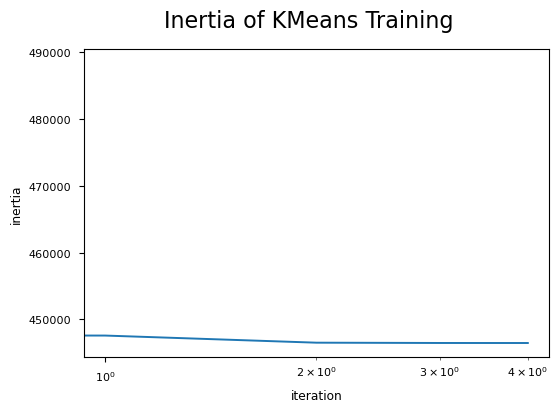

Cluster centres [[-2.3116128   2.6456735 ]
 [-1.3254566   0.93212867]
 [ 0.17013961 -1.2343284 ]]
Weakly connected sets: [array([0, 1, 2])]
Strongly connected sets: [array([0, 1, 2])]


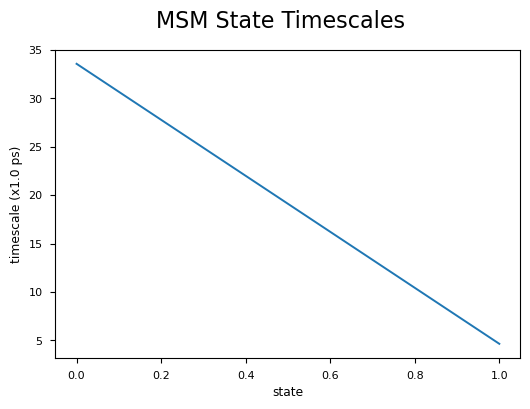

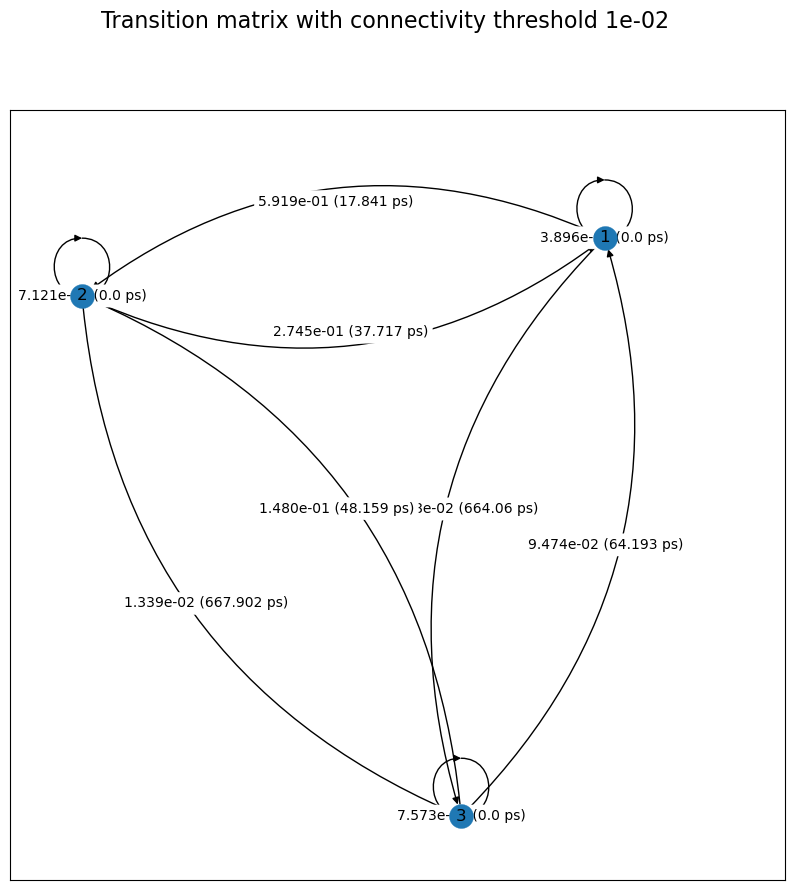

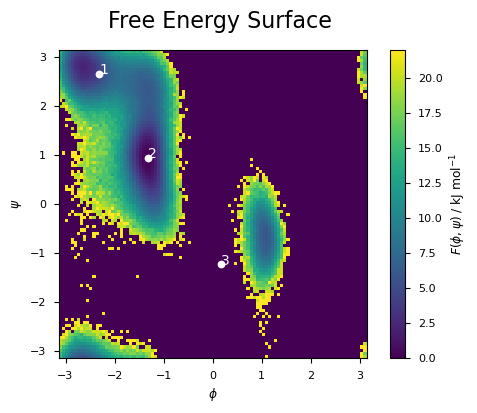

In [4]:
exp.markov_state_model(n_clusters=3, lagtime='10ps', features=['PHI 0 ALA 2', 'PSI 0 ALA 2'], feature_nicknames=['\phi', '\psi'])

# Chignolin

Chignolin has a folding time of around $0.6 \mu s$ and an unfolding time of around $2.2 \mu s$
REF: https://pubmed.ncbi.nlm.nih.gov/22034434/ (2011)

A complete characterization of the ensemble of conformations of chignolin would require calculating the free energy as a function of all of its backbone dihedral angles. In general there are two highly flexible dihedral angles per residue, ϕ and ψ, with a few exceptions like proline in which only the ψ angle can truly rotate, and the N-terminal and C-terminal residues which only have one flexible dihedral angle.

In [5]:
from Experiment import Experiment
exp = Experiment(location='../exp/outputs/chignolin/5us_NPT_chignolin_1uao', features='dihedrals')

Successfully initialised metadata.
Successfully initialised datafiles.
No metadynamics bias files supplied; assuming an unbiased trajectory.
Successfully featurized trajectory with 18 features.


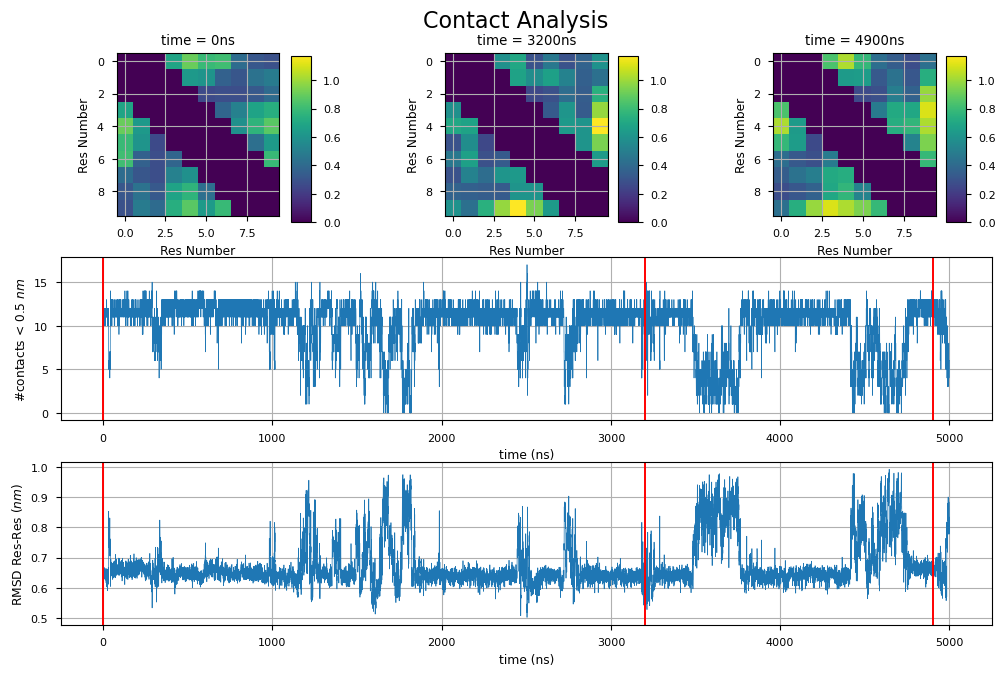

In [6]:
exp.contact_analysis(contact_threshold=0.5, times=['0ns', '3200ns', '4900ns'])

100%|██████████| 999/999 [00:02<00:00, 366.24it/s]


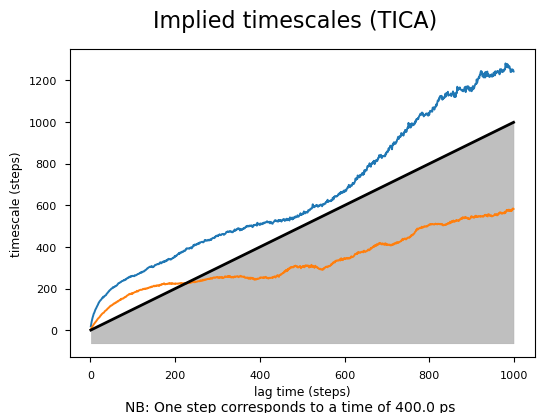

In [7]:
exp.implied_timescale_analysis(max_lag=1000, increment=1, yscale='linear')

In [17]:
print(exp.get_features())

['PHI 0 TYR 2', 'PSI 0 GLY 1', 'PHI 0 ASP 3', 'PSI 0 TYR 2', 'PHI 0 PRO 4', 'PSI 0 ASP 3', 'PHI 0 GLU 5', 'PSI 0 PRO 4', 'PHI 0 THR 6', 'PSI 0 GLU 5', 'PHI 0 GLY 7', 'PSI 0 THR 6', 'PHI 0 THR 8', 'PSI 0 GLY 7', 'PHI 0 TRP 9', 'PSI 0 THR 8', 'PHI 0 GLY 10', 'PSI 0 TRP 9']


Initiating MSM model with lagtime 40000.0 ps (lagstep 100).


KMeans iterations: 100%|██████████| 21/21 [00:00<00:00, 115.25it/s]


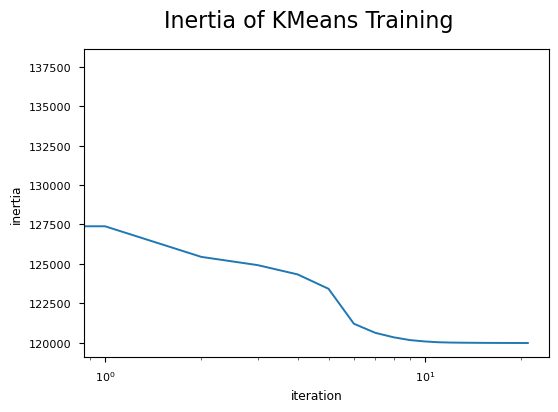

Cluster centres [[-1.8741074   2.578349   -1.9397342   2.0620582  -1.1205927   2.098361
  -1.3457667  -0.11803721 -1.6595814  -0.46082306  0.83850235 -0.10131703
  -1.8848966   0.65226835 -1.5590783   1.9881867   2.37698     2.0066063 ]
 [-2.0789354  -2.4942012  -1.9975554   2.3844237  -1.1119411   2.0636518
  -1.3770139  -0.33969158 -1.7429334  -0.5744172   1.3318704  -0.27990717
  -1.9362166  -0.11131207 -1.5998667   2.432576    2.4193974   2.3261144 ]
 [-2.0510821  -2.5333655  -2.0462365   2.4770815  -1.1165203   2.0366015
  -1.3557124  -0.37166205 -1.6763835  -0.61797804  1.286479   -0.2898665
  -2.130381    0.13654643 -1.5177772   2.5898407  -2.5124989   2.3773158 ]
 [-1.8518522   2.2073836  -2.02295     1.8875253  -1.0669618   2.3371592
  -1.3991278   0.06378203 -1.7473879  -0.22202124  0.8058528   0.00393182
  -1.6067137  -1.7390987  -1.798216    1.4948725  -1.8194928  -0.72182137]
 [-1.5302633  -2.2679758  -1.3509197   0.6399554  -1.1222988   2.35052
  -1.3693513   1.3609387  -

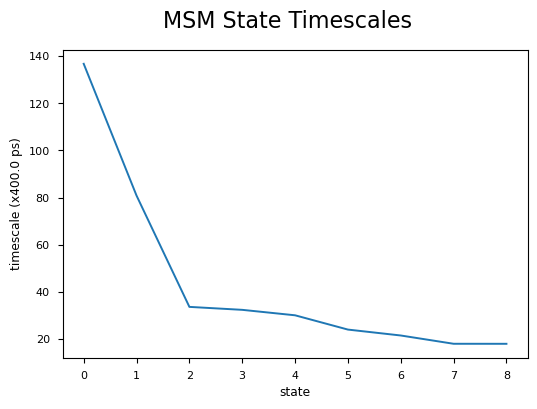

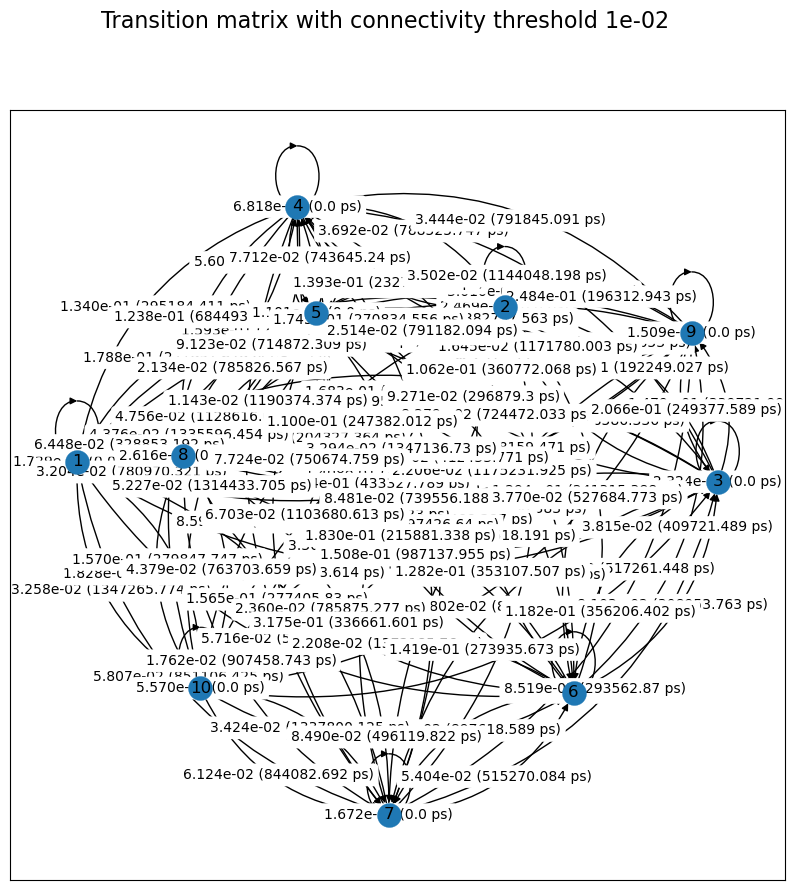

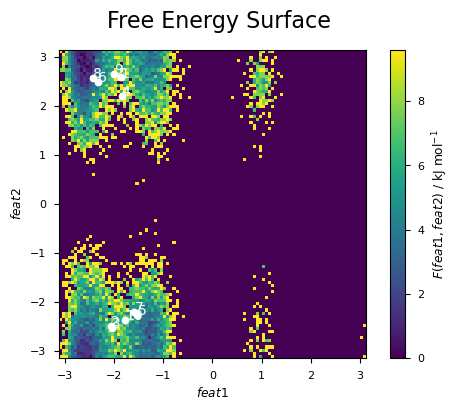

In [8]:
exp.markov_state_model(n_clusters=10, lagtime='40ns', features=['PHI 0 TYR 2', 'PSI 0 GLY 1'], feature_nicknames=['feat1', 'feat2'])